In [74]:
import numpy as np
import pandas as pd
import copy
import pickle
import matplotlib.pyplot as plt

In [75]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
x_all = spambase.data.features.to_numpy()
y_all = spambase.data.targets.to_numpy()
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [76]:
x_mean = np.mean(x_all, axis = 0)
x_std = np.std(x_all, axis = 0)
x_all = (x_all - x_mean)/x_std
y_all = y_all.reshape(y_all.shape[0]) #convert from array to vector

In [77]:
x_train = x_all[:3801]
y_train = y_all[:3801]

x_test = x_all[3801:]
y_test = y_all[3801:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

print(np.ptp(x_train, axis=0))

(3801, 57) (3801,) (800, 57) (800,)
[14.86943183 11.06603644 10.11727921 30.68817758 14.87122231 21.47597476
 18.57440479 27.70381057 18.88109179 28.19980414 12.95139066 11.22324264
 18.43834907 29.83761748 17.03917677 24.22181498 16.08082502 17.11655847
 10.56166834 35.66723609  9.25309523 16.67244979 15.56038736 28.24300777
 12.46433853 18.78539996  9.8992379  16.87967389 24.07030478 12.87689213
 30.99055782 14.48908439 32.70685441 14.45009815 37.57971382 19.10182272
 16.27282234 37.75606458 25.56227734 13.60474398 19.7693331  18.62440018
 15.95263701 32.1590986  16.46932997 10.97670689 28.45305289 35.00130988
  8.43312088 36.07496238 37.3095183   9.61643406 24.41680232 46.18963704
 34.7191573  51.25464864 26.12645798]


In [78]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [79]:
def predict(x, w, b):
    return sigmoid(np.dot(x, w) + b)

In [80]:
def cost(x, y, w, b, lambda_):
    m, n = x.shape

    cost = 0
    for i in range(m):
        f = sigmoid(np.dot(x[i], w) + b)
        cost -= y[i]*np.log(f) + (1-y[i])*np.log(1-f)
    cost /= m

    cost += lambda_*np.sum(w**2)/(2*m)

    return cost

In [82]:
def gradient(x, y, w, b, lambda_):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0.
    
    for i in range(m):
        f = sigmoid(np.dot(x[i], w) + b)
        error = f - y[i]
        dj_dw += error * x[i]
        dj_db += error

    dj_dw /= m 
    dj_db /= m

    dj_dw += lambda_*w/m 

    return dj_dw, dj_db

In [83]:
def gradient_descent(x, y, w_in, b, labmda_, alpha, iters):
    m, n = x.shape 
    w = copy.deepcopy(w_in)
    j_history = []

    for i in range(iters):
        dj_dw, dj_db = gradient(x, y, w, b, lambda_)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        cost_ = cost(x, y, w, b, lambda_)
        j_history.append(cost_)

        if i%(iters//10 + 1) == 0 or i == iters-1:
            print(i, 'Cost: ', cost_)
    
    return w, b, j_history



In [84]:
m, n = x_train.shape
init_w = np.random.rand(n) - .5
init_b = 0
lambda_ = .01
iters = 2500
alpha = .01

w_final, b_final, j_history = gradient_descent(x_train, y_train, init_w, init_b, lambda_, alpha, iters)


0 Cost:  0.720820520908807
251 Cost:  0.3995362264418716
502 Cost:  0.31864630688761914
753 Cost:  0.28213345001879886
1004 Cost:  0.2618236462428359
1255 Cost:  0.24930478242137866
1506 Cost:  0.24112808684944573
1757 Cost:  0.2351723802495932
2008 Cost:  0.23049834502012045
2259 Cost:  0.22666561431456733
2499 Cost:  0.2235620405521262


Text(0, 0.5, 'Cost')

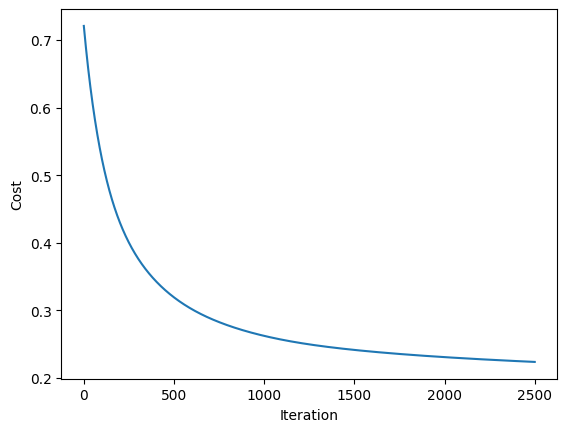

In [89]:
plt.plot(np.arange(len(j_history)), j_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')

In [86]:
correct = 0
for i in range(len(x_test)):
    f = predict(x_test[i], w_final, b_final)
    if (f >=0.5):
        pred = 1
    else:
        pred = 0
    
    if (pred == y_test[i]):
        correct += 1

print('Accuracy =', correct/len(x_test)*100, '%')

Accuracy = 80.75 %


In [87]:
print('Weights:\nW:', w_final, 'b:', b_final)
data = {
    'w': w_final,
    'b': b_final
}
with open('parameters.pickle', 'wb') as f:
    pickle.dump(data, f)

Weights:
W: [-0.05702844 -0.11591987  0.16794112  0.09927905  0.25915292  0.26423811
  0.58510217  0.39210435  0.09233965  0.0843812  -0.00643171 -0.18955768
  0.09259065  0.04233803  0.34572416  0.7138353   0.25788289  0.16975946
  0.3176085   0.32495614  0.25527084  0.55568322  0.59033871  0.5180749
 -0.63596604 -0.23110707 -0.69836234  0.06498434 -0.52777901 -0.21403284
 -0.17968687 -0.27355071 -0.37821533  0.22918268 -0.50669962 -0.13313925
 -0.31527001 -0.07632561 -0.39972409  0.05285263 -0.2459234  -0.21103798
 -0.06021432 -0.19057112 -0.25846057  0.11626133 -0.12218121 -0.53452961
  0.09551904 -0.0217167  -0.29202557  0.94178442  0.60049734  0.00616422
 -0.04228651  0.41172323  0.43049877] b: -0.2306916406063108


In [88]:
# Reading weights from file:

with open('parameters.pickle', 'rb') as f:
    data_in = pickle.load(f)

w_read = data_in['w']
b_read = data_in['b']

print('w:', w_read, 'b:', b_read)

w: [-0.05702844 -0.11591987  0.16794112  0.09927905  0.25915292  0.26423811
  0.58510217  0.39210435  0.09233965  0.0843812  -0.00643171 -0.18955768
  0.09259065  0.04233803  0.34572416  0.7138353   0.25788289  0.16975946
  0.3176085   0.32495614  0.25527084  0.55568322  0.59033871  0.5180749
 -0.63596604 -0.23110707 -0.69836234  0.06498434 -0.52777901 -0.21403284
 -0.17968687 -0.27355071 -0.37821533  0.22918268 -0.50669962 -0.13313925
 -0.31527001 -0.07632561 -0.39972409  0.05285263 -0.2459234  -0.21103798
 -0.06021432 -0.19057112 -0.25846057  0.11626133 -0.12218121 -0.53452961
  0.09551904 -0.0217167  -0.29202557  0.94178442  0.60049734  0.00616422
 -0.04228651  0.41172323  0.43049877] b: -0.2306916406063108
